### A neural net with Keras/scikit-learn for multi-class classification on toy dataset


In [0]:
#import theano
#print theano.config.device
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import model_from_json

import numpy as np
import itertools
import matplotlib.pyplot as plt
#import cv2
#import os
%matplotlib inline


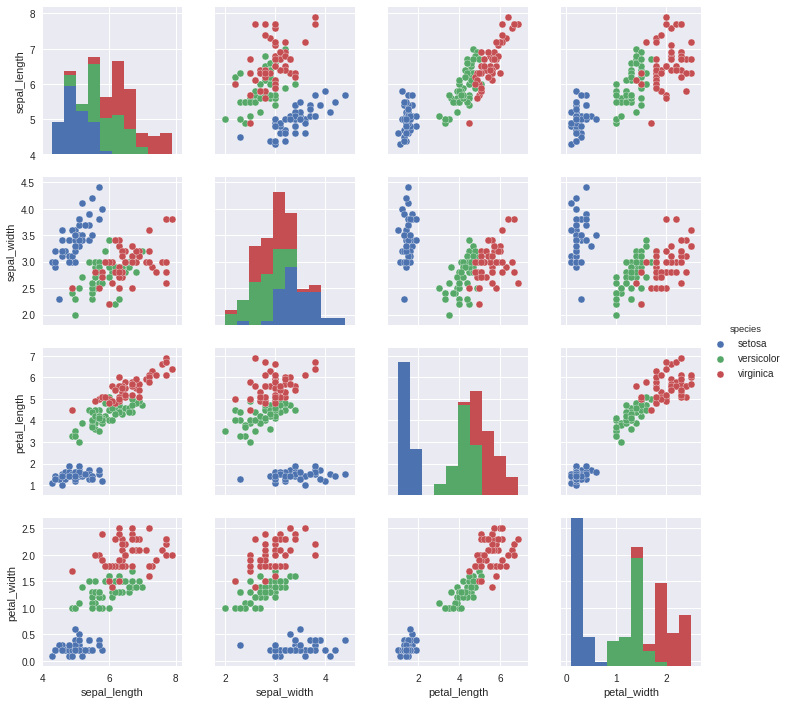

In [179]:
# random seed, reproducibility, and getting the data 
seed = 1
np.random.seed(seed)

# generate dummy radom training data or get dataset. we will get iris dataset
'''
data_dim = 3
data_size = 1000
nb_classes = 2

X = np.random.random((data_size, data_dim))
Yr = np.random.randint(nb_classes, size=(data_size, ))
# purpeosuly converting to strings as usually labels of data are strings and 
# classes should be in integers, or if they are strings they should be first converted to integers
Ys = np.char.mod('%d', Yr)  #making our integer classes synthetically strings
'''

sn.set()
iris = sn.load_dataset("iris")
sn.pairplot(iris, hue='species')

X = iris.values[:,0:4]
Y = iris.values[:,4]

# train test split
X_train, X_test, Ys_train, Ys_test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=seed)

In [0]:
# pre-processing the data, converting string labels to integers
encoder = LabelEncoder()
encoder.fit(Y)
list(encoder.classes_)

Yi_train = encoder.transform(Ys_train)
Yi_test = encoder.transform(Ys_test)

#np.array(np.unique(Yi_test, return_counts=True))
# convert integers now to dummy variables (i.e. one-hot encoded)
Y_train = np_utils.to_categorical(Yi_train)
Y_test = np_utils.to_categorical(Yi_test)

In [198]:
# neural net architecture building
model = Sequential()

# create network architecture with regularization
model.add(Dense(200, input_shape=(4,), init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(80, init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3, init='uniform'))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.001, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,  
              metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(4,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# training data
# check also http://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/ for using train_test_split and
# validationa_data within model.fit
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=400, batch_size=10, verbose=0)

In [200]:
# lets check accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

test acc: 97.78%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


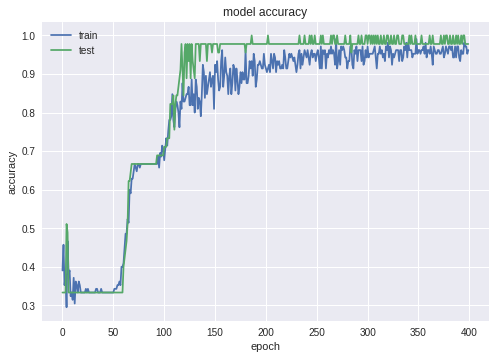

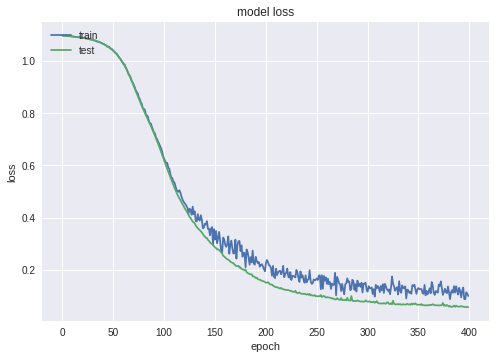

In [201]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [150]:
#lets save our model and weights, for someone to use
#serialize model and weights 
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")
 
#some time later in the future by someone or yourself...
 
#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
#needs to be compiled again to be used
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Saved model to disk
Loaded model from disk


In [202]:
# lets evaluate our loaded model, also do some confusion matrix and classification report
predictions = loaded_model.predict_classes(X_test, verbose=0)
print(predictions)
pred = encoder.inverse_transform(predictions)
print(pred)

target_names = list(encoder.classes_)
print(classification_report(Yi_test, predictions, target_names=target_names))

[2 0 0 2 1 1 2 2 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
['virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [147]:
# lets apply custom prediction on your flower
prediction = loaded_model.predict_classes(np.array([[4, 3, 1, 0.1]]), verbose=0)
yourflower = encoder.inverse_transform(prediction)
print("Your flower is %s." % yourflower[0])

Your flower is setosa.


In [0]:
# EOF (End Of File)